Link for the data on github:

https://github.com/Kiel-AI/Coding.Waterkant20/blob/2c8a53680e72b0b6bb9b1f1965a3d4f435230862/D01%2BD02/data_windfinder.zip

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_folder = '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder'

### ADDED BY LUCA

Hi guys, keep up the good work. I took another look at the data, and found it not so nice that they created file with missing rows, and different numbers of values per day. They could have provided a script to re-organize this. 

I tried to make it up, so that you can tomorrow start fresh with your X and Y values and continue to try to train a network! I am confident you can make it

Here I copy you the code, if you run, it should work and create Y and X as variable. They should be in the form that you need, and they have the same length.

I hope this helps, sorry if there are bugs. We keep in touch!

In [0]:
import glob
import csv
import numpy as np

Weatherdata_Kiel_station_files = glob.glob(project_folder + "/weatherdata_10044N_*.csv")
Pageviews_Kiel_station_files = glob.glob(project_folder + "/pageviews_10044N_*.csv")
Weatherdata_Kiel_station_files.sort()
Pageviews_Kiel_station_files.sort()
print("Weatherdata files:")
print(Weatherdata_Kiel_station_files)
print("Pageviews files:")
print(Pageviews_Kiel_station_files)
# important, we should have same files
assert(len(Weatherdata_Kiel_station_files) == len(Pageviews_Kiel_station_files))

X = []
Y = []

# you got this already , so I just use it
#average_views_per_day = np.mean(view) #thats how we calculatet
#print(mean)
pageviews_threshold = 2446.034223134839 #average_views_per_day

print("we start reading..")
for i in range(len(Pageviews_Kiel_station_files)):
    
    # read both file at the same time
    wd = Weatherdata_Kiel_station_files[i]
    pv = Pageviews_Kiel_station_files[i]
    weatherdata_list = []
    pageviews_list = []
    with open(wd) as csv_file:
        wd_reader = csv.reader(csv_file, delimiter=';')
        for row in wd_reader:
            weatherdata_list.append(row)
    with open(pv) as csv_file:
        pv_reader = csv.reader(csv_file, delimiter=';')
        for row in pv_reader:
            pageviews_list.append(row)
    
    # now check
    print("first year, we have {} days".format(len(pageviews_list)))
    for row in pageviews_list:
        # get the date
        date = row[0]     # this is the date from the pageviews 
        # here we format the date as in the other file
        date_as_in_wd = date[0:4] + "-" + date[4:6] + "-" + date[6:8] # date from pageviews, formatted as in weather data
        # tricky line!
        # I just check and collect all data where the date is the same
        weather_with_the_same_data = [row for row in weatherdata_list if row and row[0].split(" ")[0] == date_as_in_wd]
        # row[0].split(" ")[0] --> is the date in weathe_data.csv for one rwo without the time.
        # weather_with_the_same_data is a list with all rows of weather_data.csv that have same date as date_as_in_wd
        # if we have data for both file, we add
        if weather_with_the_same_data:
            # Y is ok, 1 or 0
            if int(row[1]) > pageviews_threshold:
                Y.append(1)
            else:
                Y.append(0)
            # X is a vector with 4 vlaues
            current_X = np.zeros((4))
            # loop throughs all values with the same day
            for j in range(len(weather_with_the_same_data)):
                # here I add the values
                for k in range(4):
                    current_X[k] += float(weather_with_the_same_data[j][k+1])
            # here I divide, so it becomes the average
            current_X /= len(weather_with_the_same_data)
            # append to x
            X.append(current_X)
                
    print("After reading the file {}, Y has length: {} and X has length: {}".format(i+1, len(Y), len(X)))
    
print("Finished! Y has length: {} and X has length: {}".format(len(Y), len(X)))

print("Now we transform as array")
X = np.asarray(X)
Y = np.asarray(Y)
print("And now X.shape is {} and Y.shape {}".format(X.shape, Y.shape))

Weatherdata files:
['/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/weatherdata_10044N_2016.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/weatherdata_10044N_2017.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/weatherdata_10044N_2018.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/weatherdata_10044N_2019.csv']
Pageviews files:
['/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/pageviews_10044N_2016.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/pageviews_10044N_2017.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/pageviews_10044N_2018.csv', '/content/drive/My Drive/Colab Notebooks/Hackaton/data_windfinder/pageviews_10044N_2019.csv']
we start reading..
first year, we have 366 days
After reading the file 1, Y has length: 358 and X has length: 358
first year, we have 365 days
After reading the file 2, Y has length: 723 and X has lengt

We can try to plot the values to see a bit how they look like

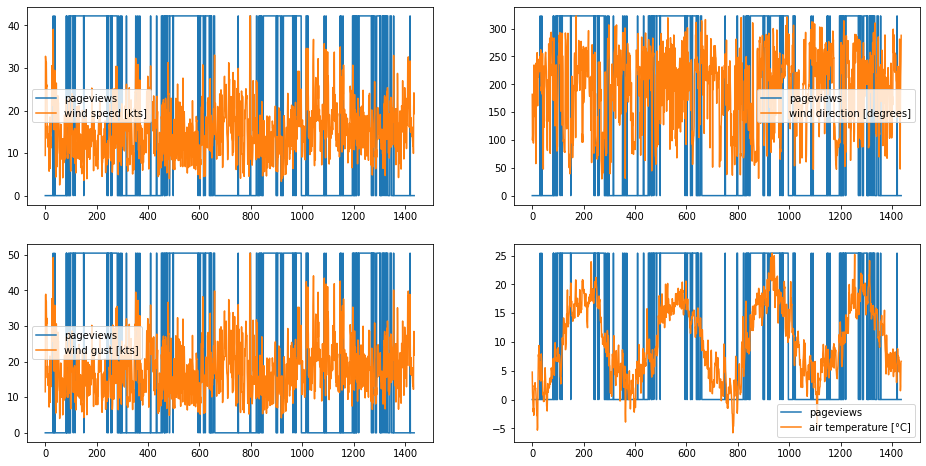

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
labels = ["wind speed [kts]", "wind direction [degrees]", "wind gust [kts]", "air temperature [°C]"]
for i in range(4):

  plt.subplot(2,2,i+1)
  plt.plot(Y * np.max(X[:,i]), label='pageviews')
  plt.plot(X[:,i], label=labels[i])
  #plt.xlim([366*2, 366*3]) # to see only one part of the graph
  plt.legend()



Nomralizing the data:

In [0]:
#we dont use this part
def norm(X):
  i = 0
  average_wind=0
  average_gust=0
  average_temp=0

  for things in X:
    average_wind += X[i, 0]
    average_gust += X[i, 2]  
    average_temp += X[i, 3]
    i+=1

  average_wind /= i
  average_gust /=i
  average_temp /=i

  return X / [average_wind, 360, average_gust, average_temp]

In [0]:
average_views_per_day = np.mean(Y) #thats how we calculatet
print(average_views_per_day)

0.4558107167710508


In [0]:
# here we shuffle the input X and output Y data 
print ("'Total number of days in 4 year are {}.".format(np.shape(Y)[0]))
shuffle_index=np.arange(np.shape(Y)[0]) # creating a shuffle index based on total hnumber of days in 4 year
print( "Checking the shuffle_index...")
print(shuffle_index)
np.random.shuffle(shuffle_index) # shuffling the values in shuffle_index array
print( "Checking the shuffle_index after shuffling...")
print(shuffle_index)
print( "Now shuffling the input X and output Y")
X = X[shuffle_index]
Y = Y[shuffle_index]
print( "Shuffling done for input X and output Y")


'Total number of days in 4 year are 1437.
Checking the shuffle_index...
[   0    1    2 ... 1434 1435 1436]
Checking the shuffle_index after shuffling...
[1130  590   93 ...  352  165 1098]
Now shuffling the input X and output Y
Shuffling done for input X and output Y


In [0]:
# Normalising the data

Norm_X=X/[np.amax(X[0]),360,np.amax(X[2]),np.amax(X[3])]
# np.amax(X[0]) is max value in wind
#360 is max wind direction
#,np.amax(X[2]) is max gust
#np.amax(X[3]) is max temperature
Norm_X[0:3]

array([[0.05850405, 0.69028749, 0.07022574, 0.03285582],
       [0.0709525 , 0.75590278, 0.08821466, 0.08975579],
       [0.05606442, 0.65251883, 0.06692161, 0.03894596]])

In [0]:
# Spliting the input X and output Y in train, dev and test sets

train_X=Norm_X[0:730]
train_Y=Y[0:730]

dev_X=Norm_X[731:1096]
dev_Y=Y[731:1096]

test_X=Norm_X[1097:np.shape(Y)[0]-1]
test_Y=Y[1097:np.shape(Y)[0]-1]
print(train_Y)



[0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 

In [0]:
# Creating the model
import tensorflow as tf
print(tf.__version__)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(4, activation=tf.nn.relu,input_shape=[4]),
                                    tf.keras.layers.Dense(4, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                     ])



2.2.0


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
history=model.fit(train_X, train_Y, epochs=100,validation_data = (dev_X,dev_Y), verbose=0)

In [0]:
count=0
for i in train_Y:
  if i==0:
    #print(i)
    count+=1
print("{}% of data are zeros".format(count/np.shape(train_Y)[0]*100))


53.28767123287671% of data are zeros


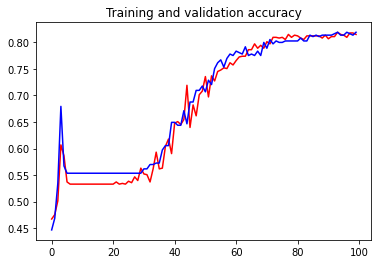

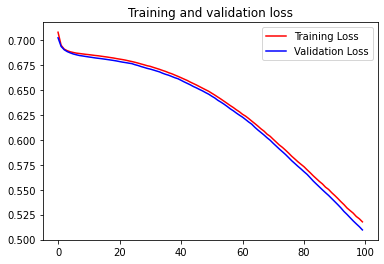

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.predict(test_X)

array([[0.49080974],
       [0.43387058],
       [0.5270978 ],
       [0.45937955],
       [0.35877132],
       [0.30598152],
       [0.42137307],
       [0.5270978 ],
       [0.34616283],
       [0.43155146],
       [0.39794534],
       [0.37285152],
       [0.41475925],
       [0.20569685],
       [0.3161004 ],
       [0.4185891 ],
       [0.28296816],
       [0.34086484],
       [0.37552768],
       [0.2846229 ],
       [0.52247053],
       [0.29589266],
       [0.5082378 ],
       [0.4478839 ],
       [0.3323782 ],
       [0.26390913],
       [0.35494924],
       [0.32065737],
       [0.28102708],
       [0.5270978 ],
       [0.51921195],
       [0.49576834],
       [0.24431854],
       [0.28890622],
       [0.40710956],
       [0.3588065 ],
       [0.36581618],
       [0.4525383 ],
       [0.5270978 ],
       [0.28814486],
       [0.33760267],
       [0.49185482],
       [0.28661954],
       [0.45184338],
       [0.28563523],
       [0.49451545],
       [0.39745522],
       [0.370